In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle5 as pickle

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install pickle5

In [215]:
path=r'/content/drive/MyDrive'
#path=r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\00Final Project'
df=pickle.load(open(f"{path}/ml_project_dataset.pkl", "rb"))

In [216]:
Data=df.values

In [217]:
for i in range(5):
    print("Number of features for each sample of f{} : ".format(i+1) ,df['f'+str(i+1)][1000].shape[0])

Number of features for each sample of f1 :  512
Number of features for each sample of f2 :  1536
Number of features for each sample of f3 :  2304
Number of features for each sample of f4 :  2560
Number of features for each sample of f5 :  204


In [218]:
#Arranging gender label
print("All types in Gender Label : " , np.unique(Data[ :,1]))
Gender = Data[ : , 1]
indices_f = [i for i, x in enumerate(Gender) if x == 'F' or x =='female' ]
indices_m = [i for i, x in enumerate(Gender) if x == 'M' or x =='male' or x == 'm' ]

for i in (indices_f): Gender[i] = 'Female'
for i in (indices_m): Gender[i] = 'Male'
Data[ : , 1] = Gender
print("Final Labels : " ,np.unique(Data[ : , 1]))  # Done

All types in Gender Label :  ['F' 'Female' 'M' 'Male' 'female' 'm' 'male']
Final Labels :  ['Female' 'Male']


In [ ]:
#Arranging Status label
print(np.unique(Data[ :,2]))
status = Data[ : ,2]
indices_S = [i for i, x in enumerate(status) if x == 'sad' or x =='S' ]
indices_H = [i for i, x in enumerate(status) if x == 'H' or x =='happy' or x == 'happy ' ]
indices_N = [i for i, x in enumerate(status) if x == 'N' or x =='Normal' or x =='natural'  or x=='neutral']

for i in (indices_S): status[i] = 'Sad'
for i in (indices_H): status[i] = 'Happy'
for i in (indices_N): status[i] = 'Neutral'

indices_fake =[i for i, x in enumerate(status) if x != 'Sad' and x !='Happy' and x!= 'Neutral' ]
print(indices_fake)
Data[ : , 2] = status

In [224]:
#Removing fake datas
Data = [Data[x , : ] for x in range(len(Data[: , 0])) if x not in (indices_fake)]
Data = np.array(Data)

In [225]:
print("Age : " ,np.unique(Data[ : , 0]))
print("Gender Label : " ,np.unique(Data[ : , 1]))
print("Status Label : " ,np.unique(Data[ : , 2]))
#All checked

Age :  [5 6 7 8 9 10 11 12 14 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 38 40 44 46 47 49 50 51 52 54 55 56 57 58 59 60 62 82]
Gender Label :  ['Female' 'Male']
Status Label :  ['Happy' 'Neutral' 'Sad']


In [ ]:
num_f = len( [i for i, x in enumerate(Data[ : , 1]) if x == 'Female'])
num_m = len( [i for i, x in enumerate(Data[ : , 1]) if x == 'Male'])
print(num_f , num_m) #Need upsampling

dataG = {'Female':num_f, 'Male':num_m}
Gender = list(dataG.keys())
valuesG = list(dataG.values())
  
fig = plt.figure(figsize = (9, 5))

plt.bar(Gender, valuesG, color ='mediumorchid',width = 0.3)
 
plt.xlabel("Gender")
plt.ylabel("number of samples")
plt.show()

In [227]:
#Remove NANs
f1 = list(Data[ : , 3])
f2 = list(Data[ : , 4])
f3 = list(Data[ : , 5])
f4 = list(Data[ : , 6])
f5 = list(Data[ : , 7])

f1= np.array(f1)
f2= np.array(f2)
f3= np.array(f3)
f4= np.array(f4)
f5= np.array(f5)

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))
print("Shape of NAN in each feature set : " ,nan_f1.shape , nan_f2.shape , nan_f3.shape , nan_f4.shape , nan_f5.shape)

Shape of NAN in each feature set :  (155136, 2) (402432, 2) (603648, 2) (0, 2) (178908, 2)


In [228]:
col_meanf1 = np.nanmean(f1 , axis = 0)
col_meanf2 = np.nanmean(f2 , axis = 0)
col_meanf3 = np.nanmean(f3 , axis = 0)
col_meanf4 = np.nanmean(f4 , axis = 0)
col_meanf5 = np.nanmean(f5 , axis = 0)

inds1 = np.where(np.isnan(f1))
f1[inds1] = np.take(col_meanf1 , inds1[1])
inds2 = np.where(np.isnan(f2))
f2[inds2] = np.take(col_meanf2 , inds2[1])
inds3 = np.where(np.isnan(f3))
f3[inds3] = np.take(col_meanf3 , inds3[1])
inds4 = np.where(np.isnan(f4))
f4[inds4] = np.take(col_meanf4 , inds4[1])
inds5 = np.where(np.isnan(f5))
f5[inds5] = np.take(col_meanf5 , inds5[1])

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

print("Shape of NAN in each feature set : " ,nan_f1.shape , nan_f2.shape , nan_f3.shape , nan_f4.shape, nan_f5.shape) #All checked     # Need to be more clean 

Shape of NAN in each feature set :  (0, 2) (0, 2) (0, 2) (0, 2) (0, 2)


# All feature sets for Gender Label

In [230]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [231]:
x_f1=f1.copy()
x_f2=f2.copy()
x_f3=f3.copy()
x_f4=f4.copy()
x_f5=f5.copy()

y_G = Data[:,1].copy()   

In [232]:
np.unique(y_G,return_counts=True)

(array(['Female', 'Male'], dtype=object), array([ 902, 1643]))

In [233]:
from sklearn.model_selection import train_test_split
# split the dataset into train and test for f1
xtrain_f1, xtest_f1, ytrain_f1, ytest_f1 = train_test_split(x_f1, y_G, test_size=0.2, random_state=40)

# split the dataset into train and test for f2
xtrain_f2, xtest_f2, ytrain_f2, ytest_f2 = train_test_split(x_f2, y_G, test_size=0.2, random_state=40)

# split the dataset into train and test for f3
xtrain_f3, xtest_f3, ytrain_f3, ytest_f3 = train_test_split(x_f3, y_G, test_size=0.2, random_state=40)

# split the dataset into train and test for f4
xtrain_f4, xtest_f4, ytrain_f4, ytest_f4 = train_test_split(x_f4, y_G, test_size=0.2, random_state=40)

# split the dataset into train and test for f5
xtrain_f5, xtest_f5, ytrain_f5, ytest_f5 = train_test_split(x_f5, y_G, test_size=0.2, random_state=40)

176 333


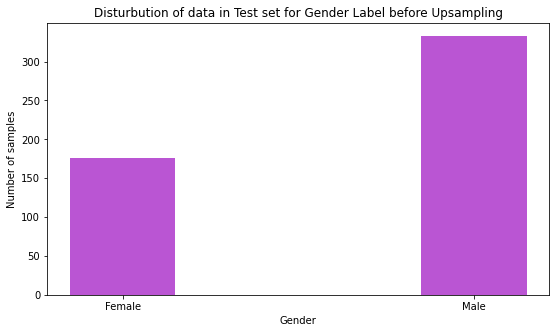

In [234]:
num_f = len( [i for i, x in enumerate(ytest_f1) if x == 'Female'])
num_m = len( [i for i, x in enumerate(ytest_f1) if x == 'Male'])
print(num_f , num_m) #Need upsampling

dataG = {'Female':num_f, 'Male':num_m}
Gender = list(dataG.keys())
valuesG = list(dataG.values())
  
fig = plt.figure(figsize = (9, 5))

plt.bar(Gender, valuesG, color ='mediumorchid',width = 0.3)
 
plt.xlabel("Gender")
plt.ylabel("Number of samples")
plt.title("Disturbution of data in Test set for Gender Label before Upsampling")
plt.show()

In [235]:
oversample = SMOTE()
xtrain_f1, ytrain_f1 = oversample.fit_resample(xtrain_f1, ytrain_f1)

xtrain_f2, ytrain_f2 = oversample.fit_resample(xtrain_f2, ytrain_f2)

xtrain_f3, ytrain_f3 = oversample.fit_resample(xtrain_f3, ytrain_f3)

xtrain_f4, ytrain_f4 = oversample.fit_resample(xtrain_f4, ytrain_f4)

xtrain_f5, ytrain_f5 = oversample.fit_resample(xtrain_f5, ytrain_f5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1310 1310


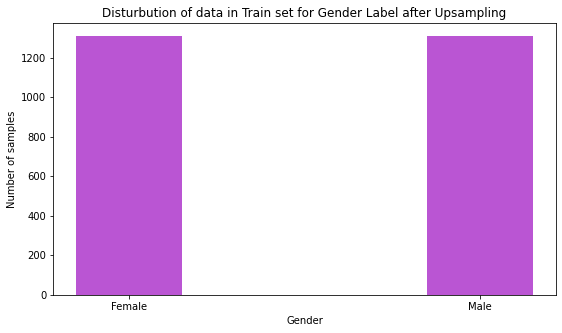

In [236]:
num_f = len( [i for i, x in enumerate(ytrain_f1) if x == 'Female'])
num_m = len( [i for i, x in enumerate(ytrain_f1) if x == 'Male'])
print(num_f , num_m) #Need upsampling

dataG = {'Female':num_f, 'Male':num_m}
Gender = list(dataG.keys())
valuesG = list(dataG.values())
  
fig = plt.figure(figsize = (9, 5))

plt.bar(Gender, valuesG, color ='mediumorchid',width = 0.3)
 
plt.xlabel("Gender")
plt.ylabel("Number of samples")
plt.title("Disturbution of data in Train set for Gender Label after Upsampling")
plt.show()

In [237]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

xtrain_f1 = sc.fit_transform(xtrain_f1)
xtest_f1 = sc.transform(xtest_f1)

xtrain_f2 = sc.fit_transform(xtrain_f2)
xtest_f2 = sc.transform(xtest_f2)

xtrain_f3 = sc.fit_transform(xtrain_f3)
xtest_f3 = sc.transform(xtest_f3)

xtrain_f4 = sc.fit_transform(xtrain_f4)
xtest_f4 = sc.transform(xtest_f4)

xtrain_f5 = sc.fit_transform(xtrain_f5)
xtest_f5 = sc.transform(xtest_f5)

# LDA

In [238]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [239]:
lda = LinearDiscriminantAnalysis(n_components=1)

xtrain_f1 = lda.fit(xtrain_f1, ytrain_f1).transform(xtrain_f1)
xtest_f1=lda.transform(xtest_f1)

xtrain_f2 = lda.fit(xtrain_f2, ytrain_f2).transform(xtrain_f2)
xtest_f2=lda.transform(xtest_f2)

xtrain_f3 = lda.fit(xtrain_f3, ytrain_f3).transform(xtrain_f3)
xtest_f3=lda.transform(xtest_f3)

xtrain_f4 = lda.fit(xtrain_f4, ytrain_f4).transform(xtrain_f4)
xtest_f4=lda.transform(xtest_f4)

xtrain_f5 = lda.fit(xtrain_f5, ytrain_f5).transform(xtrain_f5)
xtest_f5=lda.transform(xtest_f5)

In [240]:
class_names=['Female','Male']

# All Classifiers

In [241]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB   

In [243]:
classifiers=[]
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 =make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
classifiers.append(model3)
model4 = tree.DecisionTreeClassifier()
classifiers.append(model4)
model5 = RandomForestClassifier()
classifiers.append(model5)
model6 = GaussianNB()
classifiers.append(model6)

In [244]:
accuracy_f1=[]
for clf in classifiers:
  clf.fit(xtrain_f1, ytrain_f1)
  ypred_f1= clf.predict(xtest_f1)
  acc = accuracy_score(ytest_f1, ypred_f1)
  accuracy_f1.append(acc)
   
print("Accuracy of GradientBoostingClassifier for F1 : ",accuracy_f1[0])
print("Accuracy of SVC for F1 : ",accuracy_f1[1])
print("Accuracy of Pipeline for F1 : ",accuracy_f1[2])
print("Accuracy of DecisionTreeClassifier for F1 : ",accuracy_f1[3])
print("Accuracy of RandomForestClassifier for F1 : ",accuracy_f1[4])
print("Accuracy of GaussianNB for F1 : ",accuracy_f1[5])


Accuracy of GradientBoostingClassifier for F1 :  0.9351669941060904
Accuracy of SVC for F1 :  0.93713163064833
Accuracy of Pipeline for F1 :  0.93713163064833
Accuracy of DecisionTreeClassifier for F1 :  0.9233791748526523
Accuracy of RandomForestClassifier for F1 :  0.9214145383104125
Accuracy of GaussianNB for F1 :  0.9351669941060904


In [245]:
accuracy_f2=[]
for clf in classifiers:      #####   f2
    clf.fit(xtrain_f2, ytrain_f2)
    ypred_f2= clf.predict(xtest_f2)
    acc = accuracy_score(ytest_f2, ypred_f2)
    accuracy_f2.append(acc)
    print("Accuracy of %s is %0.2f"%(clf, acc*100))
print("Accuracy of GradientBoostingClassifier for F2 : ",accuracy_f2[0])
print("Accuracy of SVC for F2 : ",accuracy_f2[1])
print("Accuracy of Pipeline for F2 : ",accuracy_f2[2])
print("Accuracy of DecisionTreeClassifier for F2 : ",accuracy_f2[3])
print("Accuracy of RandomForestClassifier for F2 : ",accuracy_f2[4])
print("Accuracy of GaussianNB for F2 : ",accuracy_f2[5])

Accuracy of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is 79.96
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 77.80
Accuracy of Pi

In [246]:
accuracy_f3=[]
for clf in classifiers:     #####  f3
  clf.fit(xtrain_f3, ytrain_f3)
  ypred_f3= clf.predict(xtest_f3)
  acc = accuracy_score(ytest_f3, ypred_f3)
  accuracy_f3.append(acc)
  print("Accuracy of %s is %0.2f"%(clf, acc*100))

print("Accuracy of GradientBoostingClassifier for F3 : ",accuracy_f3[0])
print("Accuracy of SVC for F3 : ",accuracy_f3[1])
print("Accuracy of Pipeline for F3 : ",accuracy_f3[2])
print("Accuracy of DecisionTreeClassifier for F3 : ",accuracy_f3[3])
print("Accuracy of RandomForestClassifier for F3 : ",accuracy_f3[4])
print("Accuracy of GaussianNB for F3 : ",accuracy_f3[5])

Accuracy of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is 85.66
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 83.30
Accuracy of Pi

In [247]:
accuracy_f4=[]
for clf in classifiers:    #####  f4
  clf.fit(xtrain_f4, ytrain_f4)
  ypred_f4= clf.predict(xtest_f4)
  acc = accuracy_score(ytest_f4, ypred_f4)
  accuracy_f4.append(acc)
  


print("Accuracy of GradientBoostingClassifier for F4 : ",accuracy_f4[0])
print("Accuracy of SVC for F4 : ",accuracy_f4[1])
print("Accuracy of Pipeline for F4 : ",accuracy_f4[2])
print("Accuracy of DecisionTreeClassifier for F4 : ",accuracy_f4[3])
print("Accuracy of RandomForestClassifier for F4 : ",accuracy_f4[4])
print("Accuracy of GaussianNB for F4 : ",accuracy_f4[5])

Accuracy of GradientBoostingClassifier for F4 :  0.581532416502947
Accuracy of SVC for F4 :  0.6070726915520629
Accuracy of Pipeline for F4 :  0.6070726915520629
Accuracy of DecisionTreeClassifier for F4 :  0.5520628683693517
Accuracy of RandomForestClassifier for F4 :  0.587426326129666
Accuracy of GaussianNB for F4 :  0.5697445972495089


In [248]:
accuracy_f5=[]
for clf in classifiers:   ##### f5
    clf.fit(xtrain_f5, ytrain_f5)
    ypred_f5= clf.predict(xtest_f5)
    acc = accuracy_score(ytest_f5, ypred_f5)
    accuracy_f5.append(acc)
    print("Accuracy of %s is %0.2f"%(clf, acc*100))

print("Accuracy of GradientBoostingClassifier for F5 : ",accuracy_f5[0])
print("Accuracy of SVC for F5 : ",accuracy_f5[1])
print("Accuracy of Pipeline for F5 : ",accuracy_f5[2])
print("Accuracy of DecisionTreeClassifier for F5 : ",accuracy_f5[3])
print("Accuracy of RandomForestClassifier for F5 : ",accuracy_f5[4])
print("Accuracy of GaussianNB for F5 : ",accuracy_f5[5])

Accuracy of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is 62.87
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 66.80
Accuracy of Pi

In [249]:
from statistics import mean
Gender_score = []
Gender_score.append(mean(accuracy_f1))
Gender_score.append(mean(accuracy_f2))
Gender_score.append(mean(accuracy_f3))
Gender_score.append(mean(accuracy_f4))
Gender_score.append(mean(accuracy_f5))


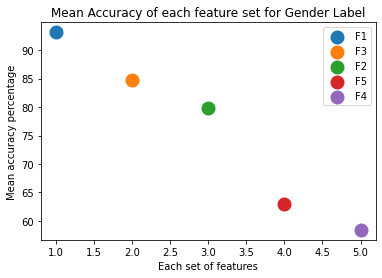

In [254]:
plt.scatter( 1 , Gender_score[0]*100 , label="F1",linewidth=8)
plt.scatter( 2 , Gender_score[2]*100 , label="F3",linewidth=8)
plt.scatter( 3 , Gender_score[1]*100 , label="F2",linewidth=8)
plt.scatter( 4 , Gender_score[4]*100 , label="F5",linewidth=8)
plt.scatter( 5 , Gender_score[3]*100 , label="F4",linewidth=8)
plt.ylabel("Mean accuracy percentage")
plt.xlabel("Each set of features")
plt.title("Mean Accuracy of each feature set for Gender Label")
plt.legend()
plt.show()

# Design the classifier

In [255]:
model1 =svm.SVC()
model1.fit(xtrain_f1, ytrain_f1)
ypred_f1= model1.predict(xtest_f1)
acc = accuracy_score(ytest_f1, ypred_f1)

In [256]:
print("Accuracy of Classifier  is : %0.2f"%(acc*100) )

Accuracy of Classifier  is : 93.71


              precision    recall  f1-score   support

      Female       0.95      0.88      0.91       176
        Male       0.94      0.98      0.96       333

    accuracy                           0.94       509
   macro avg       0.94      0.93      0.93       509
weighted avg       0.94      0.94      0.94       509



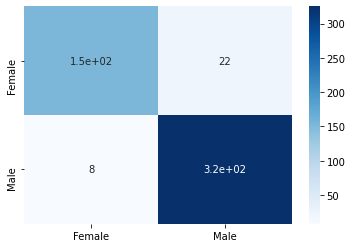

In [257]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(ytest_f1, model.predict(xtest_f1),target_names=class_names)) 
cf_matrix=confusion_matrix(ytest_f1, model.predict(xtest_f1))
import seaborn as sns
x_axis_labels = class_names 
y_axis_labels = class_names 
sns.heatmap(cf_matrix, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Blues')